# Text Classification 
This assessment is very much like the Text Classification Project we just completed, and the dataset is very similar.

The **moviereviews2.tsv** dataset contains the text of 6000 movie reviews. 3000 are positive, 3000 are negative, and the text has been preprocessed as a tab-delimited file. As before, labels are given as `pos` and `neg`. 

We've included 20 reviews that contain either `NaN` data, or have strings made up of whitespace.

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
# !pip install spacy
# !python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


### Task #1: Perform imports and load the dataset into a pandas DataFrame
For this exercise you can load the dataset from `'../TextFiles/moviereviews2.tsv'`.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./TextFiles/moviereviews2.tsv', sep='\t')
df.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


### Task #2: Check for missing values:

In [2]:
# Check for NaN values:
df.isnull().sum()

label      0
review    20
dtype: int64

In [5]:
# Check for whitespace strings (it's OK if there aren't any!):
blanks = []  # start with an empty list

for i,lb,rv in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
        
len(blanks)

0

### Task #3:  Remove NaN values:

In [5]:
df.dropna(inplace=True)

### Task #4: Take a quick look at the `label` column:

In [6]:
df['label'].value_counts()

neg    2990
pos    2990
Name: label, dtype: int64

In [7]:
!pip install wordcloud

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()



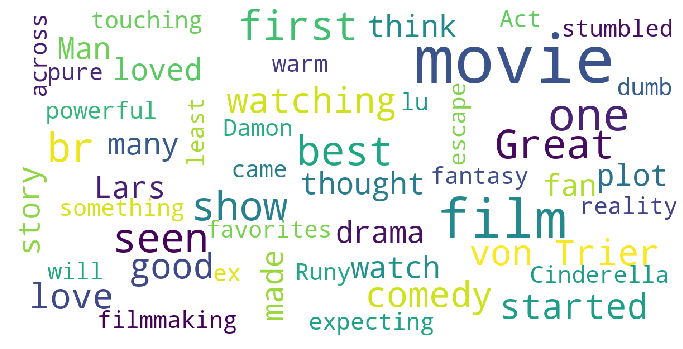

In [9]:
show_wordcloud(df[df['label']=='pos']['review'])

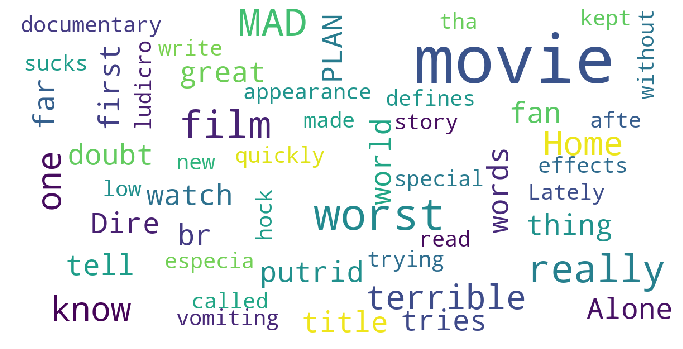

In [10]:
show_wordcloud(df[df['label']=='neg']['review'])

### Task #5: Split the data into train & test sets:
You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.33, random_state=42`

In [11]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Task #6: Build a pipeline to vectorize the date, then train and fit a model
You may use whatever model you like. To compare your results to the solution notebook, use `LinearSVC`.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [13]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
# parser = English()
# parser = nlp(disable=['parser', 'ner'])
# Creating our tokenizer function
def spacy_tokenizer(text):

    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(text)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [14]:
df['review'][1]

"A warm, touching movie that has a fantasy-like quality.<br /><br />Ellen Burstyn is, as always, superb.<br /><br />Samantha Mathis has given many great performances, but there is just something about this one will haunt your memory.<br /><br />Most of all, you've got to see this amazing 5-yr. old, Jodelle Ferland. I was so captivated by her presence, I had to buy the movie so I could watch her again and again. She is a miracle of God's creation.<br /><br />Judging by the high IMDB rating, I'm not the only one who was mesmerized by this young actress."

In [15]:
text = df['review'][1]

In [16]:
spacy_tokenizer(text)

['warm',
 'touch',
 'movie',
 'fantasy',
 'like',
 'quality.<br',
 '/><br',
 '/>ellen',
 'burstyn',
 'superb.<br',
 '/><br',
 '/>samantha',
 'mathis',
 'great',
 'performance',
 'haunt',
 'memory.<br',
 '/><br',
 '/>most',
 'amazing',
 '5-yr',
 'old',
 'jodelle',
 'ferland',
 'captivate',
 'presence',
 'buy',
 'movie',
 'watch',
 'miracle',
 'god',
 'creation.<br',
 '/><br',
 '/>judging',
 'high',
 'imdb',
 'rating',
 'mesmerize',
 'young',
 'actress']

In [17]:
#breaking the list comprehensions out into for loops
mytokens = nlp(text)
tokens = []
for word in mytokens:
    print(word)
    if word.lemma_ != "-PRON-":
        tokens.append(word.lemma_.lower().strip())
    else:
        tokens.append(word.lower_)

final_tokens = []
for word in tokens: 
    if word not in stop_words and word not in punctuations:
        final_tokens.append(word)

A
warm
,
touching
movie
that
has
a
fantasy
-
like
quality.<br
/><br
/>Ellen
Burstyn
is
,
as
always
,
superb.<br
/><br
/>Samantha
Mathis
has
given
many
great
performances
,
but
there
is
just
something
about
this
one
will
haunt
your
memory.<br
/><br
/>Most
of
all
,
you
've
got
to
see
this
amazing
5-yr
.
old
,
Jodelle
Ferland
.
I
was
so
captivated
by
her
presence
,
I
had
to
buy
the
movie
so
I
could
watch
her
again
and
again
.
She
is
a
miracle
of
God
's
creation.<br
/><br
/>Judging
by
the
high
IMDB
rating
,
I
'm
not
the
only
one
who
was
mesmerized
by
this
young
actress
.


In [18]:
final_tokens

['warm',
 'touch',
 'movie',
 'fantasy',
 'like',
 'quality.<br',
 '/><br',
 '/>ellen',
 'burstyn',
 'superb.<br',
 '/><br',
 '/>samantha',
 'mathis',
 'great',
 'performance',
 'haunt',
 'memory.<br',
 '/><br',
 '/>most',
 'amazing',
 '5-yr',
 'old',
 'jodelle',
 'ferland',
 'captivate',
 'presence',
 'buy',
 'movie',
 'watch',
 'miracle',
 'god',
 'creation.<br',
 '/><br',
 '/>judging',
 'high',
 'imdb',
 'rating',
 'mesmerize',
 'young',
 'actress']

The html tags are still present in the document and that is not ideal.  We will adds something ot our tokenizing process to remove those tags as well. This will not always be necessary for all documents, but you can change the Regex pattern to find other things like email addresses as well.  

In [19]:
import re 

# Creating our tokenizer function
def spacy_tokenizer(text):
    # remove html tags from all of the text before processing
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', text)
    # Creating our token object, which is used to create documents with linguistic annotations.
    # we disabled the parser and ner parts of the pipeline in order to speed up parsing
    mytokens = nlp(cleantext, disable=['parser', 'ner'])

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [20]:
spacy_tokenizer(df['review'][1])

['warm',
 'touch',
 'movie',
 'fantasy',
 'like',
 'quality',
 'ellen',
 'burstyn',
 'superb',
 'samantha',
 'mathis',
 'great',
 'performance',
 'haunt',
 'memory',
 'amazing',
 '5-yr',
 'old',
 'jodelle',
 'ferland',
 'captivate',
 'presence',
 'buy',
 'movie',
 'watch',
 'miracle',
 'god',
 'creation',
 'judge',
 'high',
 'imdb',
 'rating',
 'mesmerize',
 'young',
 'actress']

In [21]:
df['tokenized_sents'] = df.apply(lambda row: spacy_tokenizer(row['review']), axis=1)


In [22]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))


In [23]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer, max_features=1000, min_df=5, max_df=0.7, )


In [26]:
X = tfidf_vector.fit_transform(df['review']).toarray()

In [27]:
tfidf_vector.fit_transform(df['review'])

<5980x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 221432 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression Classifier
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])



In [31]:

search_space = [{'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(0, 2, 4)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [100, 200],
                 'classifier__max_features': [3,4]}
        ]

{'classifier': [RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False)],
 'classifier__n_estimators': [100, 200],
 'classifier__max_features': [3, 4]}

In [32]:
from sklearn.model_selection import GridSearchCV


# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=3, verbose=2, n_jobs = 1)

In [33]:
# Fit grid search
best_model = clf.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2, total=  28.7s
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.7s remaining:    0.0s


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2, total=  28.5s
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2 
[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None

/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2, total=  31.0s
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2, total=  30.0s
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2 
[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  5.9min finished


In [34]:
# View best model
best_model.best_estimator_.get_params()['classifier']


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# model generation
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=1000,
                                 min_df=5, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...b',
                                 tokenizer=<function spacy_tokenizer at 0x1a1cf95ea0>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_i

### Task #7: Run predictions and analyze the results

In [36]:
# Form a prediction set
predictions = pipe.predict(X_test)

In [37]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[851 140]
 [ 86 897]]


In [38]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.91      0.86      0.88       991
         pos       0.86      0.91      0.89       983

    accuracy                           0.89      1974
   macro avg       0.89      0.89      0.89      1974
weighted avg       0.89      0.89      0.89      1974



In [39]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.8855116514690983


In [40]:
prediction = best_model.predict(X_test)

In [41]:
print(metrics.confusion_matrix(y_test,prediction))

[[851 140]
 [ 86 897]]


In [42]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

         neg       0.91      0.86      0.88       991
         pos       0.86      0.91      0.89       983

    accuracy                           0.89      1974
   macro avg       0.89      0.89      0.89      1974
weighted avg       0.89      0.89      0.89      1974



In [43]:
print(metrics.accuracy_score(y_test,prediction))

0.8855116514690983


## Great job!